# Apply PeLEE Selection to NTuples

In [1]:
import sys
import localSettings as ls
import os
print(ls.main_path)

/uboone/app/users/cthorpe/PELEE/


In [2]:
main_path = ls.main_path
sys.path.append(main_path)

In [3]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

date and time: 06122023


In [4]:
from scipy.optimize import curve_fit

def gauss(x,mu,sigma,A):
    norm = A/(np.sqrt(2*np.pi)*sigma)
    exp  = np.exp(-((x-mu)**2)/(2*sigma*sigma))
    return norm * exp

In [5]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
#if USEBDT:
import xgboost as xgb
print("Running xgboost version " + xgb.__version__)
import nue_booster 
importlib.reload(nue_booster)
import awkward
import pandas as pd

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

Running xgboost version 0.90


### import module responsible for loading NTuples

In [6]:
import load_data_run123

In [7]:
PATH = ls.ntuple_path + 'run1/'
FILE = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2.root'

In [8]:
#'''
PATH1 = ls.ntuple_path + 'run1/nuepresel/'
#PATH1 = ls.ntuple_path + 'run1/'
FILE1 = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2.root'

PATH2 = ls.ntuple_path + 'run2/nuepresel/'
#PATH2 = ls.ntuple_path + 'run2/'
FILE2 = 'prodgenie_bnb_intrinsic_nue_overlay_run2_v08_00_00_35_run2a_reco2_reco2.root'

PATH3 = ls.ntuple_path + 'run3/nuepresel/'
#PATH3 = ls.ntuple_path + 'run3/'
FILE3 = 'prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2.root'

#Adding run 4 in
includerun4=False
if(includerun4):
    PATH4 = ls.ntuple_path + 'run4/nuepresel/'
    FILE4 = 'run4b_bnb_nu_overlay_pandora_reco2_run4b_pandora_reco2_reco2.root'
#'''

In [9]:
fold = 'nuselection'
tree = 'NeutrinoSelectionFilter'

In [10]:
VARDICT = load_data_run123.get_variables()

Getting Variables!


### Load variables needed to apply selections & plot distributions

In [11]:
variables = VARDICT['VARIABLES'] + VARDICT['NUEVARS']

In [12]:
variables += ['elec_e','truthFiducial','weightSplineTimesTune','proton_e','leeweight','elec_pz']

In [13]:
variables = list(set(variables))
print(variables)

['shrclusdir2', 'secondshower_U_nhit', 'shrclusdir0', 'shrPCA1CMed_5cm', 'shr_px', 'trk_hits_tot', 'trk_energy_tot', 'shr_pz', 'slpdg', 'trk_bkt_pdg', 'CosmicIPAll3D', 'DeltaRMS2h', 'shr_start_x', 'shr_hits_tot', 'shr_tkfit_2cm_dedx_Y', 'slclustfrac', 'shr_tkfit_gap10_nhits_V', 'true_nu_vtx_sce_z', 'secondshower_V_dot', 'slnhits', 'reco_nu_vtx_y', 'reco_nu_vtx_sce_x', 'true_nu_vtx_sce_y', 'shr_theta', 'true_nu_vtx_z', 'shr_start_z', 'evt', 'hits_y', 'theta', 'pi0truth_gamma1_xpos', 'secondshower_Y_dir', 'shr_dedx_Y_cali', 'shr_tkfit_gap10_nhits_U', 'pi0truth_gamma1_zpos', 'shr_score', 'shr_tkfit_2cm_nhits_Y', 'shrsubclusters1', 'shr_tkfit_nhits_U', 'shr_tkfit_2cm_nhits_V', 'shrclusdir1', 'shr_tkfit_gap10_dedx_U', 'reco_nu_vtx_z', 'trk_phi', 'nneutron', '_opfilter_pe_beam', 'truthFiducial', 'secondshower_U_vtxdist', 'shr_bkt_pdg', 'secondshower_Y_vtxdist', 'tksh_distance', 'leeweight', 'evnunhits', 'shr_hits_y_tot', 'trk_score', 'shr_theta_v', 'shr_start_y', 'secondshower_V_vtxdist', 'e

### Load Pandas DataFrame with NTuple contents

In [14]:
#up = uproot.open(PATH+FILE)[fold][tree]
#df = up.pandas.df(variables, flatten=False)

#'''
up1 = uproot.open(PATH1+FILE1)[fold][tree]
df1 = up1.pandas.df(variables, flatten=False)
print("Loaded Data from " + PATH1+FILE1)

up2 = uproot.open(PATH2+FILE2)[fold][tree]
df2 = up2.pandas.df(variables, flatten=False)
print("Loaded Data from " + PATH2+FILE2)

up3 = uproot.open(PATH3+FILE3)[fold][tree]
df3 = up3.pandas.df(variables, flatten=False)
print("Loaded Data from " + PATH3+FILE3)

if(includerun4):
    up4 = uproot.open(PATH4+FILE4)[fold][tree]
    df4 = up4.pandas.df(variables, flatten=False)
    print("Loaded Data from " + PATH4+FILE4)

#'''

Loaded Data from /uboone/data/users/cthorpe/PELEE/run1/nuepresel/prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run1_reco2_reco2.root
Loaded Data from /uboone/data/users/cthorpe/PELEE/run2/nuepresel/prodgenie_bnb_intrinsic_nue_overlay_run2_v08_00_00_35_run2a_reco2_reco2.root
Loaded Data from /uboone/data/users/cthorpe/PELEE/run3/nuepresel/prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2.root


### Load variables from Pandas DataFrame

In [15]:
load_data_run123.process_uproot(up1,df1)
print('loaded data from dataframe 1')

load_data_run123.process_uproot(up2,df2)
print('loaded data from dataframe 2')

load_data_run123.process_uproot(up3,df3)
print('loaded data from dataframe 3')

if(includerun4):
    load_data_run123.process_uproot(up4,df4)
    print('loaded data from dataframe 4')

loaded data from dataframe 1
loaded data from dataframe 2
loaded data from dataframe 3


In [16]:
#df = pd.concat([df1,df2,df3],ignore_index=True)
df_v = [df1,df2,df3]
if(includerun4):
    df_v.append(df4)
#df = pd.concat([df1,df2,df3,df4],ignore_index=True)
df = pd.concat(df_v,ignore_index=True)

### Set dummy variables for BNB/EXT data fields 

In [17]:
df['bnbdata']  = np.zeros_like(df['nslice'])
df['extdata']  = np.zeros_like(df['nslice'])

### Function to calculate efficiency:

In [18]:
def Eff(df,var,query,acceptance,bin_edges,absval=False):
    #print acceptance
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    bins = []
    bin_eff = []
    bin_err = []
    num_v = []
    den_v = []
    for i in range(len(bin_centers)):
        binmin = bin_edges[i]
        binmax = bin_edges[i+1]
        bincut = '%s > %f and %s < %f'%(var,binmin,var,binmax)
        if (absval == True):
            bincut = '(%s > %f and %s < %f) or (%s > -%f and %s < -%f)'%(var,binmin,var,binmax,var,binmax,var,binmin)
        if (acceptance != ''): bincut += ' and %s'%acceptance
        #print bincut
        df_tmp =  df.query(bincut) # cut on bin range for desired var.
        df_sub = df_tmp.query(query) # apply constrain 
        if (df_tmp.shape[0] == 0): continue
        num_v.append(df_sub.shape[0])
        den_v.append(df_tmp.shape[0])
        eff = df_sub.shape[0] / float( df_tmp.shape[0] )
        err = np.sqrt( eff*(1-eff)/df_tmp.shape[0] )
        bin_eff.append( eff )
        bin_err.append( err )
        bins.append(bin_centers[i])
        #print 'eff = %.02f @ bin = %.02f'%(eff,bin_centers[i])
    return np.array(bins),np.array(bin_eff),np.array(bin_err),np.array(num_v),np.array(den_v)

### various functions to perform gaussian fits

In [19]:
import scipy.optimize

def gauss_exp(x, n, mu, sigma, k):
    sigma = abs(sigma)
    condition = (x - mu) / sigma >= -k    
    y = np.copy(x)
    y[condition] = n * np.exp(-0.5 * ((x[condition] - mu) / sigma)**2)
    y[~condition] = n * np.exp(k**2 / 2 + k * ((x[~condition] - mu) / sigma))
#     print(x)
    return y

def get_function_max(f, *args):
    def func(x, *arg):
        return -f(x, *arg)
    return f(scipy.optimize.fmin(func, 0, args=args, disp=False)[0], *args)

def find_nearest(array, value):
    array = np.asarray(array)
    #print (array)
    idx = (np.abs(array - value)).argmin()
    return idx

def mpv(array):
    if sum(array) < 5:
        return np.median(array)
    
    n_bins = energy_bins
    r = energy_range
    hist, bin_edges = np.histogram(array, bins=n_bins, range=r)
    
    bin_centers = [i*r[1]/n_bins-r[1]/(n_bins*2) for i in range(1,n_bins+1)]
    try:
        popt, pcov = scipy.optimize.curve_fit(gauss_exp, bin_centers, hist, maxfev=10000)
        return scipy.optimize.fmin(lambda x: -gauss_exp(x, *popt), 0)
    except RuntimeError:
        return np.median(array)
    
def fwhm(array):
    if sum(array) < 5:
        return np.std(array)

    n_bins = energy_bins
    r = energy_range
    hist, bin_edges = np.histogram(array, bins=n_bins, range=r)
    
    bin_centers = [i*r[1]/n_bins-r[1]/(n_bins*2) for i in range(1,n_bins+1)]

    try:
        popt, pcov = scipy.optimize.curve_fit(gauss_exp, bin_centers, hist, maxfev=10000)
        x_values = np.linspace(r[0], r[1], 1000)
        y_values = gauss_exp(np.linspace(r[0], r[1], 1000), *popt)
        try:
            x_max = scipy.optimize.fmin(lambda x: -gauss_exp(x, *popt), 0)
        except RuntimeError:
            x_max = np.median(array)
        y_max = find_nearest(y_values, gauss_exp(x_max, *popt))
        y_max_value = y_values[y_max]
        fwhm1 = find_nearest(y_values[:y_max], y_max_value/2)
        fwhm2 = find_nearest(y_values[y_max:], y_max_value/2)
        x_2 = x_values[y_max:][fwhm2]     
        x_1 = x_values[:y_max][fwhm1]
        return x_2-x_1
    except RuntimeError:
        return np.std(array)

### Load variables needed to apply BDT 

In [20]:
TRAINVAR = ["shr_score","tksh_distance","tksh_angle",
            "shr_tkfit_dedx_max",
            "trkfit","trkpid",
            "subcluster","shrmoliereavg",
            "trkshrhitdist2","hits_ratio",
            "secondshower_Y_nhit","secondshower_Y_vtxdist","secondshower_Y_dot","anglediff_Y",
            "CosmicIPAll3D","CosmicDirAll3D"]

LABELS =  ['pi0','nonpi0']

TRAINVARZP = ['shrmoliereavg','shr_score', "trkfit","subcluster",
              "CosmicIPAll3D","CosmicDirAll3D",
              'secondshower_Y_nhit','secondshower_Y_vtxdist','secondshower_Y_dot','anglediff_Y',
              'secondshower_V_nhit','secondshower_V_vtxdist','secondshower_V_dot','anglediff_V',
              'secondshower_U_nhit','secondshower_U_vtxdist','secondshower_U_dot','anglediff_U',
              "shr_tkfit_2cm_dedx_U", "shr_tkfit_2cm_dedx_V", "shr_tkfit_2cm_dedx_Y",
              "shr_tkfit_gap10_dedx_U", "shr_tkfit_gap10_dedx_V", "shr_tkfit_gap10_dedx_Y",
              "shrMCSMom","DeltaRMS2h","shrPCA1CMed_5cm","CylFrac2h_1cm"]

LABELSZP = ['bkg']

def loadBDT(DF):

    for label, bkg_query in zip(LABELS, nue_booster.bkg_queries):
        with open(ls.pickle_path+'booster_%s_0304_extnumi.pickle' % label, 'rb') as booster_file:
            booster = pickle.load(booster_file)
            DF[label+"_score"] = booster.predict(xgb.DMatrix(DF[TRAINVAR]),
                                                 ntree_limit=booster.best_iteration)

    for label, bkg_query in zip(LABELSZP, nue_booster.bkg_queries):
        with open(ls.pickle_path+'booster_%s_0304_extnumi_vx.pickle' % label, 'rb') as booster_file:
            booster = pickle.load(booster_file)
            DF[label+"_score"] = booster.predict(xgb.DMatrix(DF[TRAINVARZP]),
                                                 ntree_limit=booster.best_iteration)
            
    return

### Compute additional variables for nue selection not stored directly in NTuples

In [21]:
#%conda install xgboost==0.9

In [22]:
INTERCEPT = 0.0
SLOPE = 0.83

df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']
df['trkfit'] = df['shr_tkfit_npointsvalid'] / df['shr_tkfit_npoints']
df['anglediff_Y'] = np.abs(df['secondshower_Y_dir']-df['shrclusdir2'])
df['anglediff_V'] = np.abs(df['secondshower_V_dir']-df['shrclusdir1'])
df['anglediff_U'] = np.abs(df['secondshower_U_dir']-df['shrclusdir0'])                                                                                                                       
df["ptOverP"] = df["pt"]/df["p"]
df["phi1MinusPhi2"] = df["shr_phi"]-df["trk_phi"]
df["theta1PlusTheta2"] = df["shr_theta"]+df["trk_theta"]
df['cos_shr_theta'] = np.cos(df['shr_theta'])
df['shr_tkfit_nhits_tot'] = (df['shr_tkfit_nhits_Y']+df['shr_tkfit_nhits_U']+df['shr_tkfit_nhits_V'])                                                                                                                                                                                              
df['shr_tkfit_2cm_nhits_tot'] = (df['shr_tkfit_2cm_nhits_Y']+df['shr_tkfit_2cm_nhits_U']+df['shr_tkfit_2cm_nhits_V'])                                                                                                                                                              
df['shr_tkfit_gap10_nhits_tot'] = (df['shr_tkfit_gap10_nhits_Y']+df['shr_tkfit_gap10_nhits_U']+df['shr_tkfit_gap10_nhits_V'])                                                                                                                             
df.loc[:,'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_Y']
#df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_U']
df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_max'] = df.loc[(df['shr_tkfit_nhits_U']>df['shr_tkfit_nhits_Y']),'shr_tkfit_dedx_U']
#df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df['shr_tkfit_dedx_V']
df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_max'] = df.loc[(df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_Y']) & (df['shr_tkfit_nhits_V']>df['shr_tkfit_nhits_U']),'shr_tkfit_dedx_V']
df["reco_e"] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE + df["trk_energy_tot"]
df['electron_e'] = (df["shr_energy_tot_cali"] + INTERCEPT) / SLOPE
df['proton_ke'] = df['proton_e'] - 0.938

loadBDT(df)

### load pre-determined selections for PeLEE nue/numu cut-flows

In [23]:
import unblinding_far_sideband

### 1eNp BDT selection

In [24]:
QUERYNPBDT = unblinding_far_sideband.NPPRESQ + ' and ' + unblinding_far_sideband.BDTCQ
QUERYZPBDT = unblinding_far_sideband.ZPPRESEL + ' and ' + unblinding_far_sideband.ZPBDT

### correct GENIE weights for unphysical values

In [25]:
df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.

### import matplotlib for simple plotting

In [26]:
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

plt.rcParams.update({'font.size': 14})

### Truth-based plot: split by true final-state (0pi, 0pi0p, 0piNp)

In [27]:
dfsub = df.query('(nu_pdg == 12 or nu_pdg == -12) and isVtxInFiducial == 1')

In [28]:
print('total : ',dfsub.shape[0])

df1eNpXpi = dfsub.query('nproton > 0')
df1e0pXpi = dfsub.query('nproton == 0')

print('1eNp0pi : ',df1eNpXpi.shape[0])
print('1e0p0pi : ',df1e0pXpi.shape[0])

print ('frac 1e0pXpi/1eX : %.02f'%(df1e0pXpi.shape[0]/float(dfsub.shape[0])))

total :  151881
1eNp0pi :  119379
1e0p0pi :  32502
frac 1e0pXpi/1eX : 0.21


# Fig. 2: Truth Ereco Spectrum

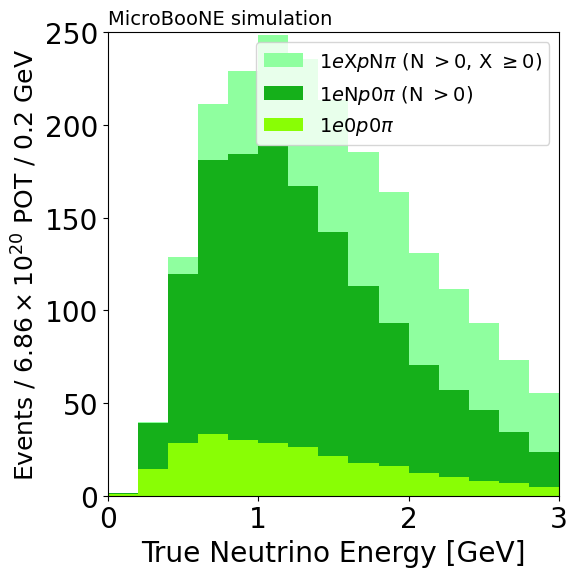

In [29]:
df1eNp0pi = dfsub.query('nproton > 0 and npion == 0 and npi0==0')
df1e0p0pi = dfsub.query('nproton == 0 and npion == 0 and npi0==0')
df1eXpNpi = dfsub.query('npion > 0 or npi0 > 0')

fig = plt.figure(figsize=(6,6))
BINS = np.linspace(0.,3.0,16)
SAMPLE = r'$\nu_{\mu}$'

POTTOT = 5.25e22 #7.75e22 # This number should be the POT of the MC Sample

vals = dfsub['nu_e']
vals1eNp0pi = df1eNp0pi['nu_e']
vals1e0p0pi = df1e0p0pi['nu_e']
vals1eXpNpi = df1eXpNpi['nu_e']

weights = dfsub['weightSplineTimesTune'] * (6.86e20 / POTTOT)
weights1eNp0pi = df1eNp0pi['weightSplineTimesTune'] * (6.86e20 / POTTOT)
weights1e0p0pi = df1e0p0pi['weightSplineTimesTune'] * (6.86e20 / POTTOT)
weights1eXpNpi = df1eXpNpi['weightSplineTimesTune'] * (6.86e20 / POTTOT)
weightsLEE = weights * dfsub['leeweight']

plt.hist([vals1e0p0pi,vals1eNp0pi,vals1eXpNpi],bins=BINS,\
         weights=[weights1e0p0pi,weights1eNp0pi,weights1eXpNpi],\
         label=['1$e$0$p$0$\pi$','1$e$N$p$0$\pi$ (N $> 0$)','1$e$X$p$N$\pi$ (N $> 0$, X $\geq 0$)'],
         color=['xkcd:lime green','xkcd:green','xkcd:mint green'],stacked=True)

lee_tot = np.concatenate([vals,vals])
lee_weights_tot = np.concatenate([weights,weightsLEE])

#plt.hist(lee_tot,bins=BINS,weights=lee_weights_tot,histtype="step",\
#         edgecolor="red",linestyle="--",lw=2,label='eLEE model')

plt.xlabel(r'True Neutrino Energy [GeV]')
plt.ylabel(r'Events / $6.86 \times 10^{20}$ POT / 0.2 GeV',fontsize=18)
plt.legend(loc=1,fontsize=18)

handles, labels = ((fig.axes)[0]).get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc=1,fontsize=14)

plt.ylim([0,250])
plt.xlim([0,3])
#plt.ylim(0., plt.gca().get_ylim()[1]*1.25)
plt.title(r'MicroBooNE simulation',fontsize=14,loc='left')
plt.tight_layout()
#fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/' + 'eLEE_noeLEE.pdf', dpi=250)
fig.savefig(ls.plots_path + 'eLEE_noeLEE.pdf',dpi=250)
plt.show()

In [30]:
dfreco = df.query(QUERYZPBDT)

In [31]:
plt.rcParams.update({'font.size': 14})

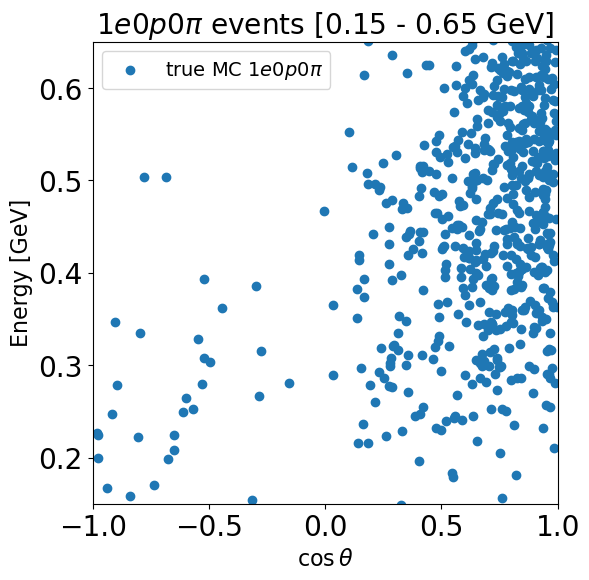

In [32]:
fig = plt.figure(figsize=(6,6))
BINS2D = (np.linspace(-1,1,20),np.linspace(0.15,0.65,20))
plt.scatter(dfreco['cos_shr_theta'],dfreco['reco_e'],label='true MC 1$e$0$p$0$\pi$')#,bins=BINS2D)
plt.xlim([-1,1])
plt.ylim([0.15,0.65])
plt.xlabel(r'$\cos\theta$',fontsize=16)
plt.legend(loc=2)
plt.ylabel('Energy [GeV]',fontsize=16)
plt.title(r'1$e$0$p$0$\pi$ events [0.15 - 0.65 GeV]')
plt.show()

# Energy Resolution

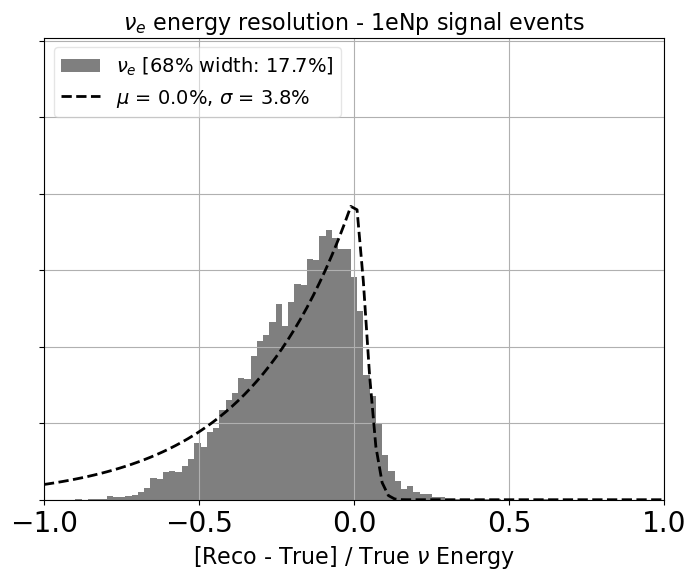

In [33]:
fig = plt.figure(figsize=(8,6))
START = 0.0
B = np.linspace(-1,1,100)
XBINS = np.linspace(B[0],B[-1],100)

# Apply 1eNp BDT selection
dfsub = df.query(QUERYNPBDT + ' and nproton > 0 and npion == 0')

dfsub_QE = dfsub.query('interaction == 0')
dfsub_MEC = dfsub.query('interaction == 10')
dfsub_OTR = dfsub.query('interaction != 0 and interaction != 10')

#RECOVAR = 'neutrino_energy'
RECOVAR = 'reco_e'
#TRUEVAR = 'true_e_visible'
TRUEVAR = 'nu_e'
MASS = 0.00

PART = '$\\nu_{e}$'

var_ALL_v = (dfsub[RECOVAR] - (dfsub[TRUEVAR] + MASS)) / (dfsub[TRUEVAR] + MASS)
var_QE_v = (dfsub_QE[RECOVAR] - (dfsub_QE[TRUEVAR] + MASS) ) / (dfsub_QE[TRUEVAR] + MASS)
var_MEC_v = (dfsub_MEC[RECOVAR] - (dfsub_MEC[TRUEVAR] + MASS) ) / (dfsub_MEC[TRUEVAR] + MASS)
var_OTR_v = (dfsub_OTR[RECOVAR] - (dfsub_OTR[TRUEVAR] + MASS) ) / (dfsub_OTR[TRUEVAR] + MASS)

quantile_med = np.quantile(var_ALL_v,0.5)
quantile_up  = np.quantile(var_ALL_v,0.5+0.34)
quantile_dn  = np.quantile(var_ALL_v,0.5-0.34)
quantile_ALL_res = (quantile_up-quantile_dn)/2.

quantile_med = np.quantile(var_QE_v,0.5)
quantile_up  = np.quantile(var_QE_v,0.5+0.34)
quantile_dn  = np.quantile(var_QE_v,0.5-0.34)
quantile_QE_res = (quantile_up-quantile_dn)/2.

# ALL
vals,binedges,s = plt.hist(var_ALL_v ,bins=B,histtype='stepfilled',lw=2,alpha=0.5,\
                           label=r'%s [68%% width: %.01f%%]'%(PART,100.*quantile_ALL_res),color='k')
bincenters = 0.5*(binedges[1:]+binedges[:-1])
popt, pcov = scipy.optimize.curve_fit(gauss_exp, bincenters, vals, maxfev=10000,\
                                      p0=[np.max(vals),0.0,0.2,0.1],
                                     bounds=([0,0,0,0],[1e4,0.1,0.2,1.0]))
plt.plot(XBINS,gauss_exp(XBINS,*popt),'--',color='k',lw=2,\
         label='$\mu$ = %.01f%%, $\sigma$ = %.01f%%'%(100.*popt[1],100.*popt[2]))

plt.title(r'$\nu_{e}$ energy resolution - 1eNp signal events',fontsize=16)

plt.xlabel(r'[Reco - True] / True $\nu$ Energy',fontsize=16)
plt.grid()
#plt.ylim([0,1.2])
plt.xlim([-1,1])
plt.gca().set_yticklabels([])
plt.legend(loc=2,fontsize=14,framealpha=0.5)
plt.ylim(0, plt.gca().get_ylim()[1]*1.5)
#plt.yscale('log')
#plt.title(r'v08_00_00_26 Run1 Samples')
#plt.legend(loc=7,fontsize=14)
plt.show()

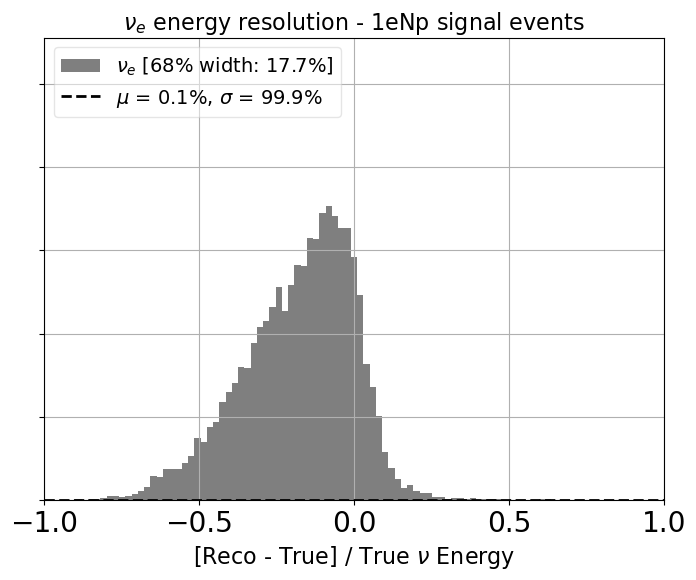

In [34]:
def gauss(x,mu,sigma,A):
    norm = A/(np.sqrt(2*np.pi)*sigma)
    exp  = np.exp(-((x-mu)**2)/(2*sigma*sigma))
    return norm * exp

fig = plt.figure(figsize=(8,6))
START = 0.0
B = np.linspace(-1,1,100)
XBINS = np.linspace(B[0],B[-1],100)

# Apply 1eNp BDT selection
dfsub = df.query(QUERYNPBDT + ' and nproton > 0 and npion == 0')

RECOVAR = 'reco_e'
TRUEVAR = 'nu_e'
MASS = 0.00

PART = '$\\nu_{e}$'

var_ALL_v = (dfsub[RECOVAR] - (dfsub[TRUEVAR] + MASS)) / (dfsub[TRUEVAR] + MASS)

# ALL
vals,binedges,s = plt.hist(var_ALL_v ,bins=B,histtype='stepfilled',lw=2,alpha=0.5,\
                           label=r'%s [68%% width: %.01f%%]'%(PART,100.*quantile_ALL_res),color='k')
bincenters = 0.5*(binedges[1:]+binedges[:-1])
popt, pcov = scipy.optimize.curve_fit(gauss, bincenters, vals, maxfev=10000,\
                                      p0=[0.0,0.2,0.1],
                                     bounds=([0,0,0],[0.1,0.2,1.0]))
plt.plot(XBINS,gauss_exp(XBINS,*popt,k=1),'--',color='k',lw=2,\
         label='$\mu$ = %.01f%%, $\sigma$ = %.01f%%'%(100.*popt[1],100.*popt[2]))

plt.title(r'$\nu_{e}$ energy resolution - 1eNp signal events',fontsize=16)

plt.xlabel(r'[Reco - True] / True $\nu$ Energy',fontsize=16)
plt.grid()
plt.xlim([-1,1])
plt.gca().set_yticklabels([])
plt.legend(loc=2,fontsize=14,framealpha=0.5)
plt.ylim(0, plt.gca().get_ylim()[1]*1.5)
plt.show()

# Efficiency

query...
acceptance...
isVtxInFiducial == 1 and truthFiducial == 1 and ccnc>=0 and npi0==0 and npion==0


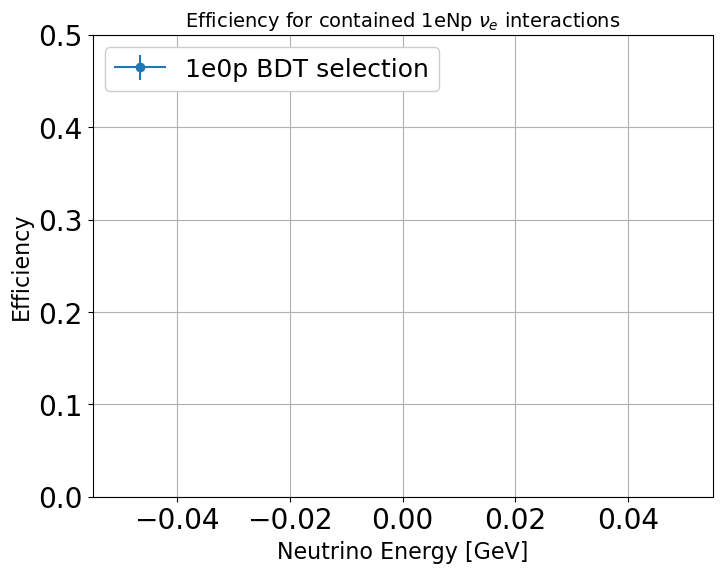

In [35]:
fig = plt.figure(figsize=(8,6))
START = 0.
B = np.linspace(0.15,1.55,1)
VAR = 'nu_e' 

ACCEPTANCE = 'isVtxInFiducial == 1 and truthFiducial == 1 and ccnc>=0 and npi0==0 and npion==0'
ACCEPTANCENP = ACCEPTANCE + ' and nproton > 0'

num_v = []
den_v = []

centers,vals,errs,num_v,den_v = Eff(df,VAR,QUERYNPBDT,ACCEPTANCENP,B)
plt.errorbar(centers-START,vals,yerr=errs,fmt='o-',label=r'1e0p BDT selection')

print ('query...')
print ('acceptance...')
print (ACCEPTANCE)

plt.xlabel(r'Neutrino Energy [GeV]',fontsize=16)
plt.ylabel(r'Efficiency',fontsize=16)
plt.title(r'Efficiency for contained 1eNp $\nu_e$ interactions',fontsize=14)
plt.grid()
plt.ylim([0,0.5])
plt.legend(loc=2,fontsize=18,framealpha=1.0)
plt.show()

# Resolution

In [36]:
dfres = df.query(QUERYNPBDT)

In [37]:
import matplotlib.gridspec as gridspec

energy_range = (0.03,2.03)
energy_bins = 25

def gauss_exp(x, n, mu, sigma, k):
    sigma = abs(sigma)
    condition = (x - mu) / sigma >= -k    
    y = np.copy(x)
    y[condition] = n * np.exp(-0.5 * ((x[condition] - mu) / sigma)**2)
    y[~condition] = n * np.exp(k**2 / 2 + k * ((x[~condition] - mu) / sigma))
#     print(x)
    return y

def get_function_max(f, *args):
    def func(x, *arg):
        return -f(x, *arg)
    return f(scipy.optimize.fmin(func, 0, args=args, disp=False)[0], *args)

def find_nearest(array, value):
    array = np.asarray(array)
    #print (array)
    idx = (np.abs(array - value)).argmin()
    return idx

def mpv(array):
    if sum(array) < 5:
        return np.median(array)
    
    n_bins = energy_bins
    r = energy_range
    hist, bin_edges = np.histogram(array, bins=n_bins, range=r)
    
    bin_centers = [i*r[1]/n_bins-r[1]/(n_bins*2) for i in range(1,n_bins+1)]
    try:
        popt, pcov = scipy.optimize.curve_fit(gauss_exp, bin_centers, hist, maxfev=10000)
        return scipy.optimize.fmin(lambda x: -gauss_exp(x, *popt), 0)
    except RuntimeError:
        return np.median(array)
    
def fwhm(array):
    if sum(array) < 5:
        return np.std(array)

    n_bins = energy_bins
    r = energy_range
    hist, bin_edges = np.histogram(array, bins=n_bins, range=r)
    
    bin_centers = [i*r[1]/n_bins-r[1]/(n_bins*2) for i in range(1,n_bins+1)]

    try:
        popt, pcov = scipy.optimize.curve_fit(gauss_exp, bin_centers, hist, maxfev=10000)
        x_values = np.linspace(r[0], r[1], 1000)
        y_values = gauss_exp(np.linspace(r[0], r[1], 1000), *popt)
        try:
            x_max = scipy.optimize.fmin(lambda x: -gauss_exp(x, *popt), 0)
        except RuntimeError:
            x_max = np.median(array)
        y_max = find_nearest(y_values, gauss_exp(x_max, *popt))
        y_max_value = y_values[y_max]
        fwhm1 = find_nearest(y_values[:y_max], y_max_value/2)
        fwhm2 = find_nearest(y_values[y_max:], y_max_value/2)
        x_2 = x_values[y_max:][fwhm2]     
        x_1 = x_values[:y_max][fwhm1]
        return x_2-x_1
    except RuntimeError:
        return np.std(array)

In [38]:
# define resolution to be measured
RECOVAR = 'electron_e'
TRUEVAR = 'elec_e'
EMIN = 0.07
EMAX = 1.07
NBINS = 10
EBINS = np.linspace(EMIN,EMAX,NBINS+1)
RESLOW = -1
RESHIGH = 1
VARIABLENAME = 'Electron Energy'

#RECOVAR = 'protonenergy'
#TRUEVAR = 'proton_ke'
#EMIN = 0.0
#EMAX = 1.0
#NBINS = 10
#EBINS = np.linspace(EMIN,EMAX,NBINS+1)
#RESLOW = -0.5
#RESHIGH = 0.5
#VARIABLENAME = 'Proton KE'

#RECOVAR = 'trk_energy_muon'
#TRUEVAR = 'muon_ke'
#EMIN = 0.05
#EMAX = 1.00
#NBINS = 20
#EBINS = np.linspace(EMIN,EMAX,NBINS+1)
#RESLOW = -0.5
#RESHIGH = 0.5
#VARIABLENAME = 'Muon KE'

'''
RECOVAR = 'reco_e'
TRUEVAR = 'true_e_visible'
EMIN = 0.2
EMAX = 1.5
NBINS = 14
EBINS = np.linspace(EMIN,EMAX,NBINS+1)
RESLOW = -1
RESHIGH = 1
VARIABLENAME = 'Neutrino Energy'
'''

"\nRECOVAR = 'reco_e'\nTRUEVAR = 'true_e_visible'\nEMIN = 0.2\nEMAX = 1.5\nNBINS = 14\nEBINS = np.linspace(EMIN,EMAX,NBINS+1)\nRESLOW = -1\nRESHIGH = 1\nVARIABLENAME = 'Neutrino Energy'\n"

In [39]:
bin_means, bin_edges, binnumber = scipy.stats.binned_statistic(
    dfres[TRUEVAR], dfres[RECOVAR], statistic=mpv, range=(EMIN,EMAX), bins=EBINS)

#bin_stdev, bin_edges, binnumber = scipy.stats.binned_statistic(
#    df[TRUEVAR], df[RECOVAR], statistic=fwhm, range=(EMIN,EMAX), bins=10)

Optimization terminated successfully.
         Current function value: -44.154543
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: -362.655606
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -549.896079
         Iterations: 22
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -568.771854
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -492.465365
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -386.261854
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -298.733299
         Iterations: 24
         Function evaluations: 48
Optimization t

/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


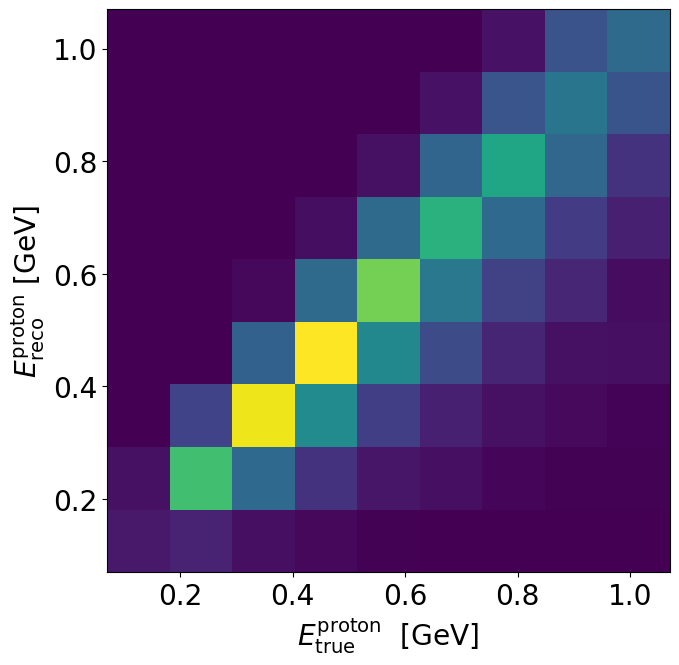

In [40]:
BINS2D = (np.linspace(EMIN,EMAX,NBINS),np.linspace(EMIN,EMAX,NBINS))
heatmap, xedges, yedges = np.histogram2d(dfres[TRUEVAR], dfres[RECOVAR], bins=BINS2D )
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
fig, ax  = plt.subplots(figsize=(7,7))
ax.imshow(heatmap.T, extent=extent, origin='lower')#,norm=LogNorm())
bin_centers = (bin_edges + (bin_edges[1]-bin_edges[0])/2)[:-1]
#ax.errorbar(
#    bin_centers,
#    bin_means,
#    xerr=0.01,
#    #yerr=bin_stdev/2,
#    fmt='ko')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(bin_centers, bin_means)
#ax.plot(bin_centers, intercept + slope*bin_centers, 'r', label=r'$E^{\mathrm{e}}_{\mathrm{reco}}=%.2f E^{\mathrm{e}} %.2f$ MeV' % (slope, intercept*1000))
#leg = ax.legend(title=r'MicroBooNE Simulation Preliminary')
#leg._legend_box.align = "left"
#plt.setp(leg.get_title(), fontweight='bold')


#ax.set_xlabel(r"$E^{\mathrm{\nu_e}}_{\mathrm{visible}}$  [GeV]")
#ax.set_ylabel(r"$E^{\mathrm{\nu_e}}_{\mathrm{reco}}$ [GeV]")
#ax.set_xlabel(r"$E^{\mathrm{electron}}_{\mathrm{true}}$  [GeV]")
#ax.set_ylabel(r"$E^{\mathrm{electron}}_{\mathrm{reco}}$ [GeV]")
ax.set_xlabel(r"$E^{\mathrm{proton}}_{\mathrm{true}}$  [GeV]")
ax.set_ylabel(r"$E^{\mathrm{proton}}_{\mathrm{reco}}$ [GeV]")
#ax.set_ylim(EMIN,EMAX)
#ax.set_xlim(EMIN,EMAX)
fig.tight_layout()

#fig.savefig(ls.plots_path+"p_calib.pdf")

/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


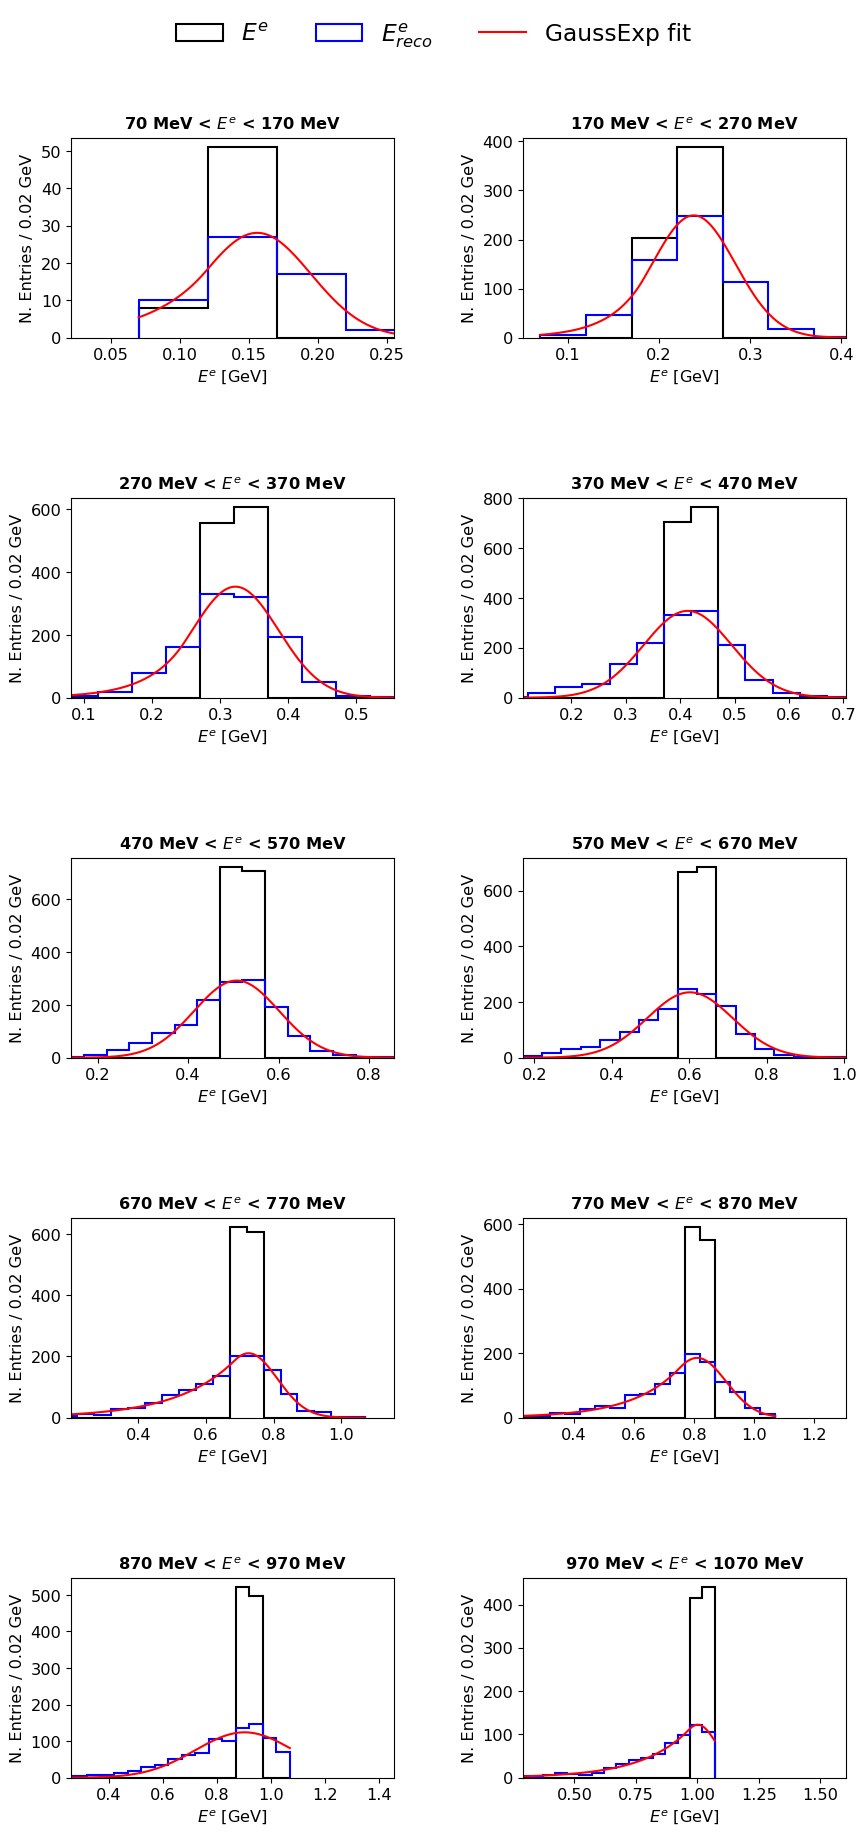

In [41]:
fig, ax = plt.subplots(figsize=(10, 20))
gs = gridspec.GridSpec(int(NBINS/2), 2, hspace=0.8, wspace=0.4)

NBINSPLOT = 20

params = {
    'legend.fontsize': 'large',
    'axes.labelsize': 'small',
    'axes.titlesize': 'small',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small'
}

pylab.rcParams.update(params)

for i in range(NBINS):
    df_bin = dfres.query("%f < %s < %f" % (EBINS[i],TRUEVAR,EBINS[i+1]))
    label_true = ""
    label_reco = ""
    label_fit = ""
    if i == 0:
        label_true = r"$E^e$"
        label_reco = r"$E^e_{reco}$"
        label_fit = r'GaussExp fit'

    plt.subplot(gs[i]).hist(
        df_bin[TRUEVAR],
        linewidth=1.5,
        bins=NBINSPLOT,
        range=(EMIN,EMAX),
        #range=(EBINS[i]*0.3,EBINS[i+1]*1.5),
        histtype='step',
        color='k',
        label=label_true)

    hist, bin_edges, patches = plt.subplot(gs[i]).hist(
        df_bin[RECOVAR],
        linewidth=1.5,
        color='b',
        histtype='step',
        range=(EMIN,EMAX),
        #range=(EBINS[i]*0.3,EBINS[i+1]*1.5),
        bins=NBINSPLOT,
        label=label_reco)

    #r = (EBINS[i]*0.3,EBINS[i+1]*1.5) # (EMIN,EMAX)
    r = (EMIN,EMAX)
    n_bins = NBINSPLOT

    bin_centers = [
        i * (r[1] - r[0]) / n_bins - (r[1] - r[0]) / (n_bins * 2) + r[0]
        for i in range(1, n_bins + 1)
    ]
    
    #print (bin_centers)
    
    popt, pcov = scipy.optimize.curve_fit(
        gauss_exp, bin_centers, hist, maxfev=10000)
    x_values = np.linspace(r[0], r[1], 1000)
    y_values = gauss_exp(np.linspace(r[0], r[1], 1000), *popt)
    plt.plot(x_values, y_values, color='r', label=label_fit)
    plt.subplot(gs[i]).set_xlim(EBINS[i]*0.3,EBINS[i+1]*1.5)
    plt.subplot(gs[i]).set_title(
        "%g MeV < $E^e$ < %g MeV" % (EBINS[i] * 1000,EBINS[i+1] * 1000),
        fontweight='bold')
    plt.subplot(gs[i]).set_xlabel(r"$E^e$ [GeV]")
    plt.subplot(gs[i]).set_ylabel(r"N. Entries / 0.02 GeV")

fig.legend(loc='upper center', ncol=3, frameon=False)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
#fig.savefig(ls.plots_path+"e_spectra.pdf")

SLOPE is 0.9560492514797955 
fit-values are  [10.03445772  0.1         0.1704477   1.        ]
SLOPE is 0.9560492514797955 
fit-values are  [1.20741562e+02 1.00000000e-01 1.36999005e-01 8.88977478e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.32194363e+02 1.00000000e-01 1.20499668e-01 5.20376106e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.84262855e+02 7.59804245e-02 1.23106873e-01 5.45064567e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.82380734e+02 7.31919824e-02 1.17126875e-01 4.81521626e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.66187283e+02 6.83389124e-02 1.13643441e-01 4.46605150e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.44350835e+02 6.63521248e-02 1.07814343e-01 4.15781949e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.40183797e+02 5.70190562e-02 1.06417164e-01 4.64699720e-01]
SLOPE is 0.9560492514797955 
fit-values are  [2.18011853e+02 7.19133044e-02 8.93833143e-02 3.34497776e-01]
SLOPE is 0.9560492514797955 
fit-values are  [1.9

/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


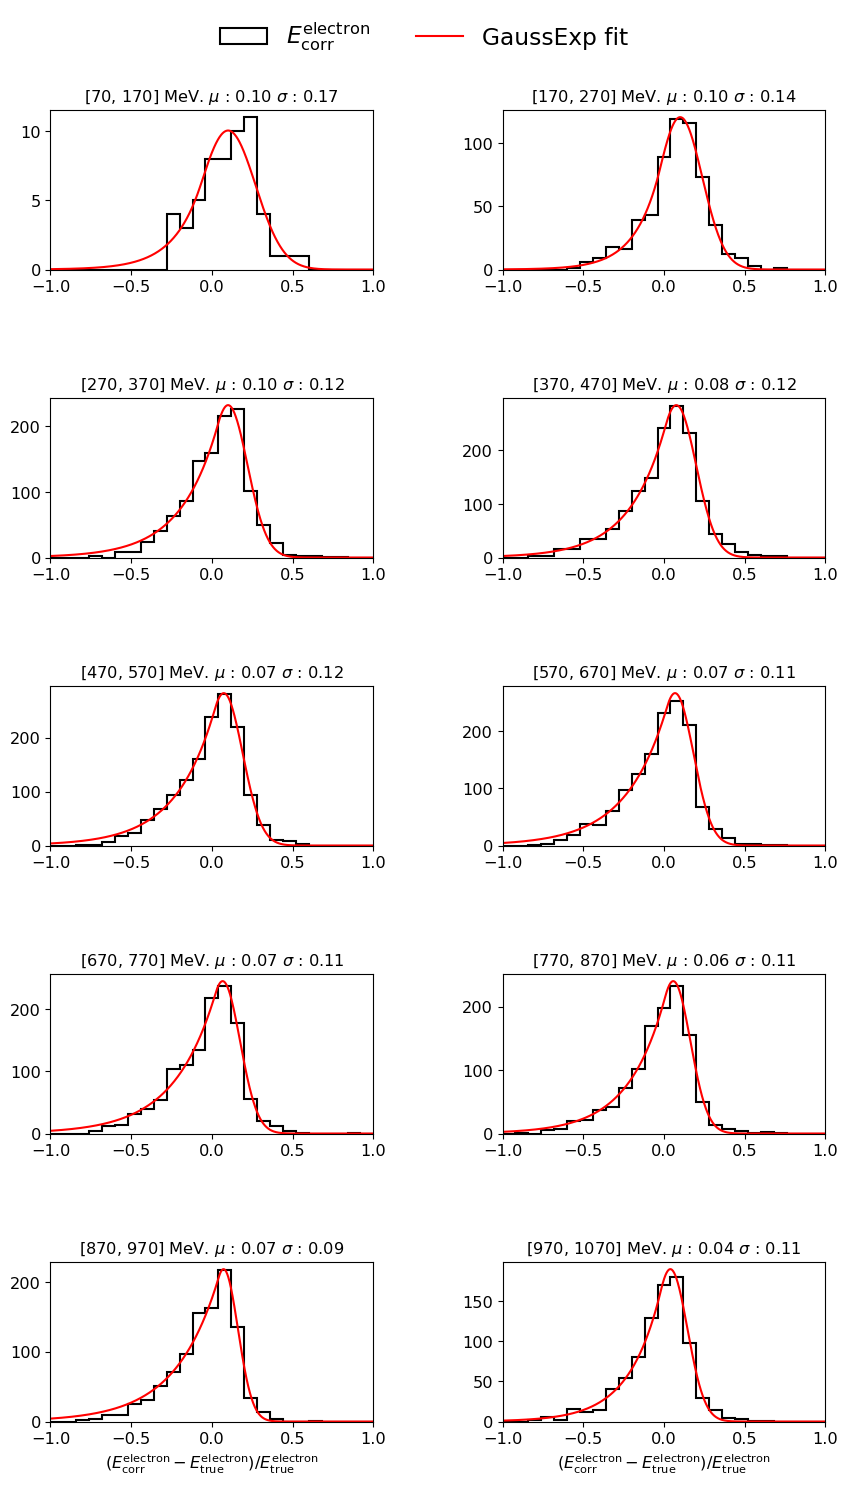

In [42]:
params = {
    'legend.fontsize': 'large',
    'axes.labelsize': 'small',
    'axes.titlesize': 'small',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small'
}

pylab.rcParams.update(params)

fig_res, ax_res = plt.subplots(figsize=(10, 16))
gs_res = gridspec.GridSpec(int(NBINS/2), 2, hspace=0.8, wspace=0.4)

sigma = np.array([])
sigma_err = np.array([])

for i in range(NBINS):
    df_bin = dfres.query("%f < %s < %f" %(EBINS[i],TRUEVAR,EBINS[i+1]))
    label_true = ""
    label_reco = ""
    label_fit = ""
    if i == 0:
        label_true = r"$E^{\mathrm{electron}}_{\mathrm{corr}}$"
        label_reco = r"$E^{\mathrm{electron}}_{reco}$"
        label_fit = r'GaussExp fit'

    #e_res = (df_bin[RECOVAR] - df_bin[TRUEVAR]) / df_bin[TRUEVAR]
    # for electrons add slope correction
    print ('SLOPE is %s '%slope)
    e_res = ( (df_bin[RECOVAR]/slope) - df_bin[TRUEVAR]) / df_bin[TRUEVAR]
    n_bins = 25

    hist, bin_edges, patches = plt.subplot(gs_res[i]).hist(
        e_res,
        linewidth=1.5,
        bins=n_bins,
        range=(RESLOW,RESHIGH),
        histtype='step',
        color='k',
        label=label_true)

    r = (RESLOW,RESHIGH)

    bin_centers = np.array([
        i * (r[1] - r[0]) / len(hist) - (r[1] - r[0]) / (len(hist) * 2) + r[0]
        for i in range(1, len(hist) + 1)
    ])

    #'''
    fit_range = np.logical_and(bin_centers < 0.5, bin_centers > -0.5)
    # n, mu, sigma, k
    popt, pcov = scipy.optimize.curve_fit(
        gauss_exp,
        bin_centers[fit_range],
        hist[fit_range],
        maxfev=10000,
        p0=(100,0.0,0.2,0.1),
        bounds=((0, -0.5, 0, 0), (5e4, 0.1, 1.0, 1)))
    
    print ('fit-values are ',popt)

    x_values = np.linspace(r[0], r[1], 1000)
    y_values = gauss_exp(np.linspace(r[0], r[1], 1000), *popt)
    sigma = np.append(sigma, popt[2])
    sigma_err = np.append(sigma_err, math.sqrt(np.diagonal(pcov)[2]))
    plt.plot(x_values, y_values, color='r', label=label_fit)
    plt.subplot(gs_res[i]).set_xlim(RESLOW,RESHIGH)
    plt.subplot(gs_res[i]).set_title(
        r"[%.0f, %.0f] MeV. $\mu$ : %.02f $\sigma$ : %.02f" % (EBINS[i]*1000.,EBINS[i+1]*1000., popt[1], popt[2]))
    #plt.subplot(gs_res[i]).legend(loc=1)
    if (i >= (NBINS-2)):
        plt.subplot(gs_res[i]).set_xlabel(r"$(E^{\mathrm{electron}}_{\mathrm{corr}}-E^{\mathrm{electron}}_{\mathrm{true}})/E^{\mathrm{electron}}_{\mathrm{true}}$")
    #plt.subplot(gs_res[i]).set_ylabel(r"N. Entries / 0.02")
    #'''

fig_res.legend(loc='upper center', ncol=2, frameon=False)
fig_res.tight_layout()
fig_res.subplots_adjust(top=0.93)
#fig_res.savefig(ls.plots_path+"res.pdf")

[0.17044770066176476, 0.13699900510935814, 0.12049966759232816, 0.12310687253805276, 0.11712687485334905, 0.11364344097731707, 0.10781434307280317, 0.10641716447991303, 0.08938331431879883, 0.10634665483016309]


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


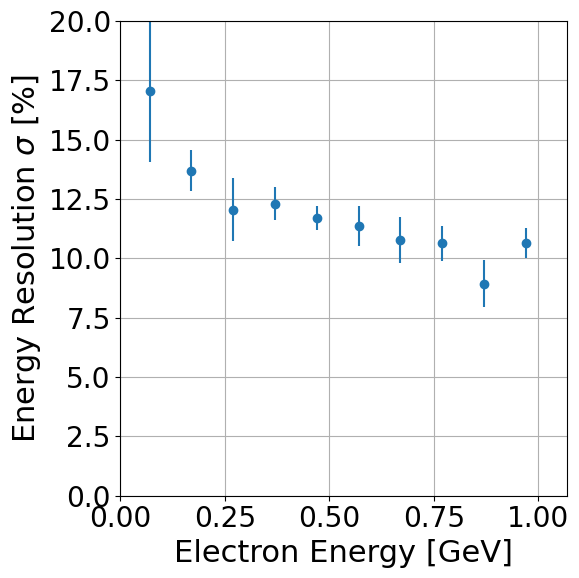

In [43]:
params = {
    'legend.fontsize': 'large',
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

fig, ax = plt.subplots(figsize=(6, 6))
x_centers = np.array([EBINS[i] * 1000 for i in range(NBINS)])


def res_fit(x, a, b, c):
    return np.sqrt((a / np.sqrt(x))**2 + (b / x)**2 + c**2)


print(list(sigma))

ax.errorbar(
    x_centers / 1000,
    sigma * 100,
    #xerr=0.1,
    yerr=sigma_err[0:] * 100,
    fmt='o',
    label=r"")

popt, pcov = scipy.optimize.curve_fit(
    res_fit,
    x_centers / 1000,
    sigma * 100,
    maxfev=10000,
    bounds=((0, 0, 0), (np.inf, np.inf, np.inf)),
    sigma=sigma_err * 100)


x_values = np.linspace(0, EMAX, 1000)
y_values = res_fit(np.linspace(0, EMAX, 1000), *popt)

'''
plt.plot(
    x_values,
    y_values,
    linewidth=2,
    label=
    r'$\left(\frac{%.2f}{\sqrt{E / \mathrm{GeV}}}\oplus\frac{%.2f}{E / \mathrm{GeV}}\oplus %.2f\right)$ %%'
    % (popt[0], popt[1], popt[2]))
'''

ax.set_ylim(0,20)
ax.set_xlim(0, EMAX)
ax.set_xlabel(r"%s [GeV]"%VARIABLENAME,fontsize=22)
ax.set_ylabel(r"Energy Resolution $\sigma$ [%]",fontsize=22)
#plt.title('Electron Energy Resolution')
plt.grid()

#fig.legend(frameon=False, loc='best', bbox_to_anchor=(0.45, 0.45, 0.45, 0.45),fontsize=18)
fig.tight_layout()
#fig.savefig(ls.plots_path+"p_sigma_res.pdf")

SLOPE is 0.9560492514797955 
fit-values are  [2.05622950e+03 6.95561438e-02 1.16605055e-01 4.97529912e-01]


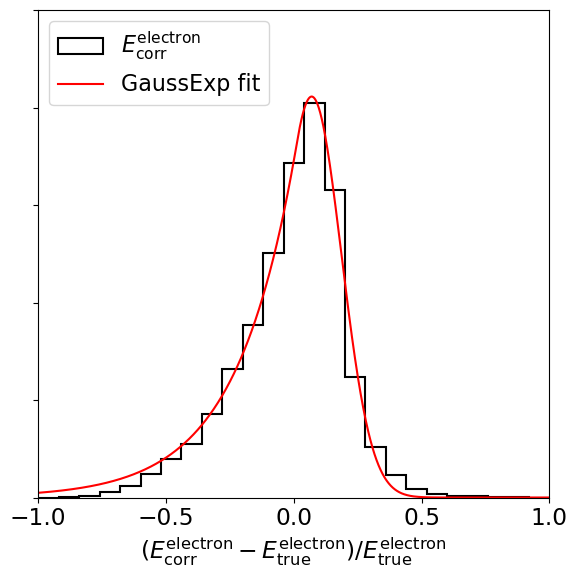

In [44]:
params = {
    'legend.fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'large',
    'ytick.labelsize': 'large'
}

pylab.rcParams.update(params)

fig = plt.figure(figsize=(6,6))

sigma = np.array([])
sigma_err = np.array([])

df_bin = dfres.query("%f < %s < %f" %(0.07,TRUEVAR,1.07))

label_true = r"$E^{\mathrm{electron}}_{\mathrm{corr}}$"
label_reco = r"$E^{\mathrm{electron}}_{reco}$"
label_fit = r'GaussExp fit'

#e_res = (df_bin[RECOVAR] - df_bin[TRUEVAR]) / df_bin[TRUEVAR]
# for electrons add slope correction
print ('SLOPE is %s '%slope)
e_res = ( (df_bin[RECOVAR]/slope) - df_bin[TRUEVAR]) / df_bin[TRUEVAR]
n_bins = 25

hist, bin_edges, patches = plt.hist(
    e_res,
    linewidth=1.5,
    bins=n_bins,
    range=(RESLOW,RESHIGH),
    histtype='step',
    color='k',
    label=label_true)

r = (RESLOW,RESHIGH)

bin_centers = np.array([
    i * (r[1] - r[0]) / len(hist) - (r[1] - r[0]) / (len(hist) * 2) + r[0]
    for i in range(1, len(hist) + 1)
])

#'''
fit_range = np.logical_and(bin_centers < 0.5, bin_centers > -0.5)
# n, mu, sigma, k
popt, pcov = scipy.optimize.curve_fit(
    gauss_exp,
    bin_centers[fit_range],
    hist[fit_range],
    maxfev=10000,
    p0=(100,0.0,0.2,0.1),
    bounds=((0, -0.5, 0, 0), (5e4, 0.1, 1.0, 1)))
    
print ('fit-values are ',popt)

x_values = np.linspace(r[0], r[1], 1000)
y_values = gauss_exp(np.linspace(r[0], r[1], 1000), *popt)
sigma = np.append(sigma, popt[2])
sigma_err = np.append(sigma_err, math.sqrt(np.diagonal(pcov)[2]))
plt.plot(x_values, y_values, color='r', label=label_fit)
plt.xlim(RESLOW,RESHIGH)
plt.ylim(0,2500)
plt.gca().yaxis.set_ticklabels([])
#plt.title(
#    r"[%.0f, %.0f] MeV. $\mu$ : %.02f $\sigma$ : %.02f" % (EBINS[i]*1000.,EBINS[i+1]*1000., popt[1], popt[2]))
#plt.subplot(gs_res[i]).legend(loc=1)
#if (i >= (NBINS-2)):
plt.xlabel(r"$(E^{\mathrm{electron}}_{\mathrm{corr}}-E^{\mathrm{electron}}_{\mathrm{true}})/E^{\mathrm{electron}}_{\mathrm{true}}$")
plt.legend(loc=2,fontsize=16)
plt.tight_layout()
plt.savefig(ls.plots_path + 'eres.pdf',dpi=250)
plt.show()